# 모바일 시장 현황 조사 

In [183]:
# module import 
import pandas as pd 
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Video

### columns 설명 

In [184]:
# - yearID: 연도 구분 (Y1 다음년도가 Y2)
# - weekIndex: 주차 1~52주
# - rank: 해당 주차의 앱 순위
# - appID: 앱 구분자
# - uniqueInstall: 앱 설치자 수(중복 불포함)
# - UU: 주간 이용자 수
# - useRate: 설치자중 이용자 비율
# - totalDuration: 총 이용시간(분)
# - avgDuration: 이용자당 평균 이용시간(분)
# - dayCounts: 이용자의 평균 접속일수

In [185]:
df = pd.read_csv('./Data/mobileTrendDataset.csv', sep='\t', engine="python")

### EDA

In [186]:
df["score"] = 101 - df["rank"]
df["yearID"] = df["yearID"].str.replace("Y","").astype(int)
df["num"] = df["yearID"] * df['weekIndex']

In [187]:
df.head()

,yearID,weekIndex,rank,appID,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,genreID,score,num
0,1,1,1,N0001,7027982,6690166,95.19,1314483816,196.48,4.10,G01,100,1
1,1,1,2,N0002,8979953,6012020,66.95,598676952,99.58,4.09,G02,99,1
2,1,1,3,N0003,8527132,5475405,64.21,818737310,149.53,4.33,G03,98,1
3,1,1,4,N0004,5527188,2617074,47.35,116433622,44.49,3.02,G03,97,1
4,1,1,5,N0005,2733015,1920640,70.28,175892211,91.58,3.44,G03,96,1


#### Racebar 

In [188]:
df = df[["appID", "score"]]

In [189]:
data = pd.DataFrame(index= list(df["appID"].unique())).reset_index().rename(columns={"index": "appID"})

In [190]:
for i in range(int(len(df)/100)):
    df1 = df.iloc[i*100: (i+1)*100]
    data = pd.merge(data, df1, on="appID", how="outer").fillna(0)

In [191]:
# 한주 한주 횡으로 붙여주기
data.head()

,appID,score_x,score_y,score_x,score_y,score_x,score_y,score_x,score_y,score_x,...,score_x,score_y,score_x,score_y,score_x,score_y,score_x,score_y,score_x,score_y
0,N0001,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,58.0,63.0,58.0,57.0,42.0,35.0,47.0,29.0,51.0,63.0
1,N0002,99.0,99.0,99.0,98.0,97.0,97.0,97.0,97.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N0003,98.0,98.0,98.0,99.0,98.0,98.0,98.0,98.0,99.0,...,95.0,94.0,95.0,94.0,94.0,95.0,94.0,95.0,95.0,94.0
3,N0004,97.0,97.0,97.0,95.0,94.0,93.0,91.0,93.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N0005,96.0,96.0,96.0,96.0,96.0,95.0,94.0,94.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
data = data.drop_duplicates("appID")

In [193]:
data = data.T
data = data.rename(columns = data.iloc[0])
data = data.drop(data.index[0])
data = data.reset_index(drop=True).astype(int)
data.index = (data.index +1).map(str) + "week"


In [194]:
data.head()

,N0001,N0002,N0003,N0004,N0005,N0006,N0007,N0008,N0009,N0010,...,N1197,N1198,N1199,N1200,N1201,N1202,N1203,N1204,N1205,N1206
1week,100,99,98,97,96,95,94,93,92,91,...,0,0,0,0,0,0,0,0,0,0
2week,100,99,98,97,96,95,0,93,0,88,...,0,0,0,0,0,0,0,0,0,0
3week,100,99,98,97,96,95,0,92,0,86,...,0,0,0,0,0,0,0,0,0,0
4week,100,98,99,95,96,94,0,85,0,89,...,0,0,0,0,0,0,0,0,0,0
5week,100,97,98,94,96,95,0,81,0,88,...,0,0,0,0,0,0,0,0,0,0


In [195]:
import bar_chart_race as bcr
bcr.bar_chart_race(df = data, 
                   n_bars = 6, 
                   sort='desc',
                   title='mobile',
                   filename = 'mobile.mp4')


In [196]:
Video("mobile.mp4")

### round2 

- rank data

In [197]:
df = pd.read_csv('./Data/mobileTrendDataset.csv', sep='\t', engine="python")
df["score"] = 101 - df["rank"]
# 일등부터 100점 ~~~ 1점
df_1 = df.copy()

In [198]:
rank_df = df.groupby(["appID","genreID"]).sum(1).reset_index()

In [199]:
rank_df.head()

,appID,genreID,weekIndex,rank,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,score
0,N0001,G01,2756,1815,223257297,144191245,5856.88,12888999388,6553.19,391.86,8689
1,N0002,G02,1128,241,201149151,104010987,2367.38,7949296602,3839.81,174.44,4506
2,N0003,G03,2756,326,423198183,278651940,6839.61,39216061733,14111.03,452.69,10178
3,N0004,G03,605,1226,62336062,22070672,1022.64,640007362,701.00,72.33,2309
4,N0005,G03,1414,913,92122605,53462724,3269.36,2883728647,2820.12,156.75,5147


In [200]:
# 전체 기간에 대한 종합 점수 합으로 데이터 프레임 만듬 --> rank_df
# 총 1206개의 어플 중에서 상위 백등의 장르 분포 
top100_rank = rank_df.sort_values(by="score", ascending=False)[:100]

In [201]:
top100_rank.head()

,appID,genreID,weekIndex,rank,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,score
2,N0003,G03,2756,326,423198183,278651940,6839.61,39216061733,14111.03,452.69,10178
11,N0012,G04,2783,1568,141628907,84571175,6526.28,8368183455,10256.43,294.82,9340
188,N0188,G03,2735,594,236689704,156513414,6488.73,19667188977,12229.43,417.60,9304
141,N0141,G05,2750,1022,217364328,148110520,6459.68,16915651246,10249.32,451.35,9179
261,N0261,G05,2678,236,311597337,224351642,6624.25,29361033203,11939.88,362.73,9056


In [202]:
# top100에 장르 분포 확인해보기 
(df["genreID"].unique()) 

array(['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10'], dtype=object)

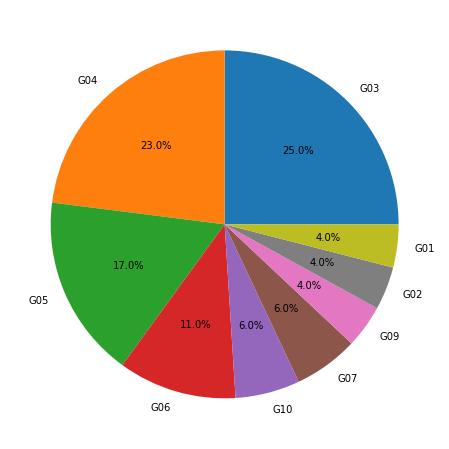

특이한점 장르는 G01 ~ G10까지 존재하는데, 
trank score 기준으로 top100등 안에는 G08이 존재 하지 않는다


In [203]:
plt.figure(figsize=(12,8))
val = top100_rank.value_counts("genreID").values
keys = top100_rank.value_counts("genreID").keys()
plt.pie(val, labels=keys, autopct='%.1f%%')
plt.show()

print(f"특이한점 장르는 G01 ~ G10까지 존재하는데, \ntrank score 기준으로 top100등 안에는 G08이 존재 하지 않는다")

#### G08은 머냐 그럼 ..

<BarContainer object of 10 artists>

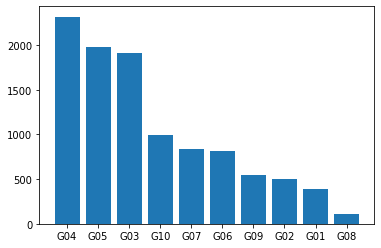

In [204]:
# 장르 분포 확인 원본 데이터에서 
keys = df.value_counts("genreID").keys()
values = df.value_counts("genreID").values

plt.bar(keys, values)

In [205]:
### 전체 장르 에서도 혼자 제일 적어... 불쌍해...

In [206]:
# 그럼  어플 갯수는, 다운로드 수는?, 주간이용자 수는? ,설치자 중 이용자 비율?, 총 이용시간(분)?, 이용자당 평균 이용시간(분)?은

# G08 Frame 만들어보기

In [207]:
 # G08 frame 만들어보자 
G08_df = df[df["genreID"] == "G08"]
G08_df.head(3)

,yearID,weekIndex,rank,appID,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts,genreID,score
29,Y1,1,30,N0030,1249795,305580,24.45,5283478,17.29,1.69,G08,71
131,Y1,2,32,N0030,1148375,276182,24.05,2353071,8.52,1.49,G08,69
222,Y1,3,23,N0030,1066954,428392,40.15,3487111,8.14,1.76,G08,78


In [208]:
uni = G08_df["appID"].unique()

print(f"어플 이름 \n {uni} 입니다\n")
print("top100에 들어갔었던 G08 장르의 어플 갯수는 {} 입니다".format(len(uni)),sep= "\n")
print("전체 데이터에서 어플 갯수는 {} 입니다".format(len(df["appID"].unique())))

어플 이름 
 ['N0030' 'N0207' 'N0459' 'N0674' 'N0756' 'N0765' 'N0854' 'N1002' 'N1018'
 'N1025' 'N1118' 'N1158'] 입니다

top100에 들어갔었던 G08 장르의 어플 갯수는 12 입니다
전체 데이터에서 어플 갯수는 1206 입니다


# rader chart 

In [223]:
df.describe().mean().T

uniqueInstall    7.183265
UU               8.076987
useRate          2.679928
totalDuration    8.210658
avgDuration      3.106284
dayCounts        1.500000
dtype: float64

In [210]:
G08_compare = G08_df.groupby("appID").sum() - df.describe().mean().astype(int).T
G08_compare = G08_compare[["uniqueInstall", "UU", "useRate", "totalDuration", "avgDuration", "dayCounts"]]

In [211]:
# G08_compare 데이터 프레임 , value(G08) - mean_value(df)
G08_compare.head()

,uniqueInstall,UU,useRate,totalDuration,avgDuration,dayCounts
appID,,,,,,
N0030,10569455,2753658,-869.92,-222576210,-1406.05,-1275.27
N0207,-3202687,-820918,-1178.03,-250795717,-1514.17,-1299.49
N0459,3889979,3241645,-615.48,47939601,-720.31,-1255.61
N0674,-3338550,-940885,-1264.69,-252978457,-1533.71,-1300.87
N0756,-365348,1453141,185.76,588286432,4724.37,-1207.41


In [220]:
a = pd.DataFrame(np.log(G08_compare.values))
a.index = G08_compare.index
a.columns = G08_compare.columns
a = a.fillna(0)
a.reset_index(inplace=True)

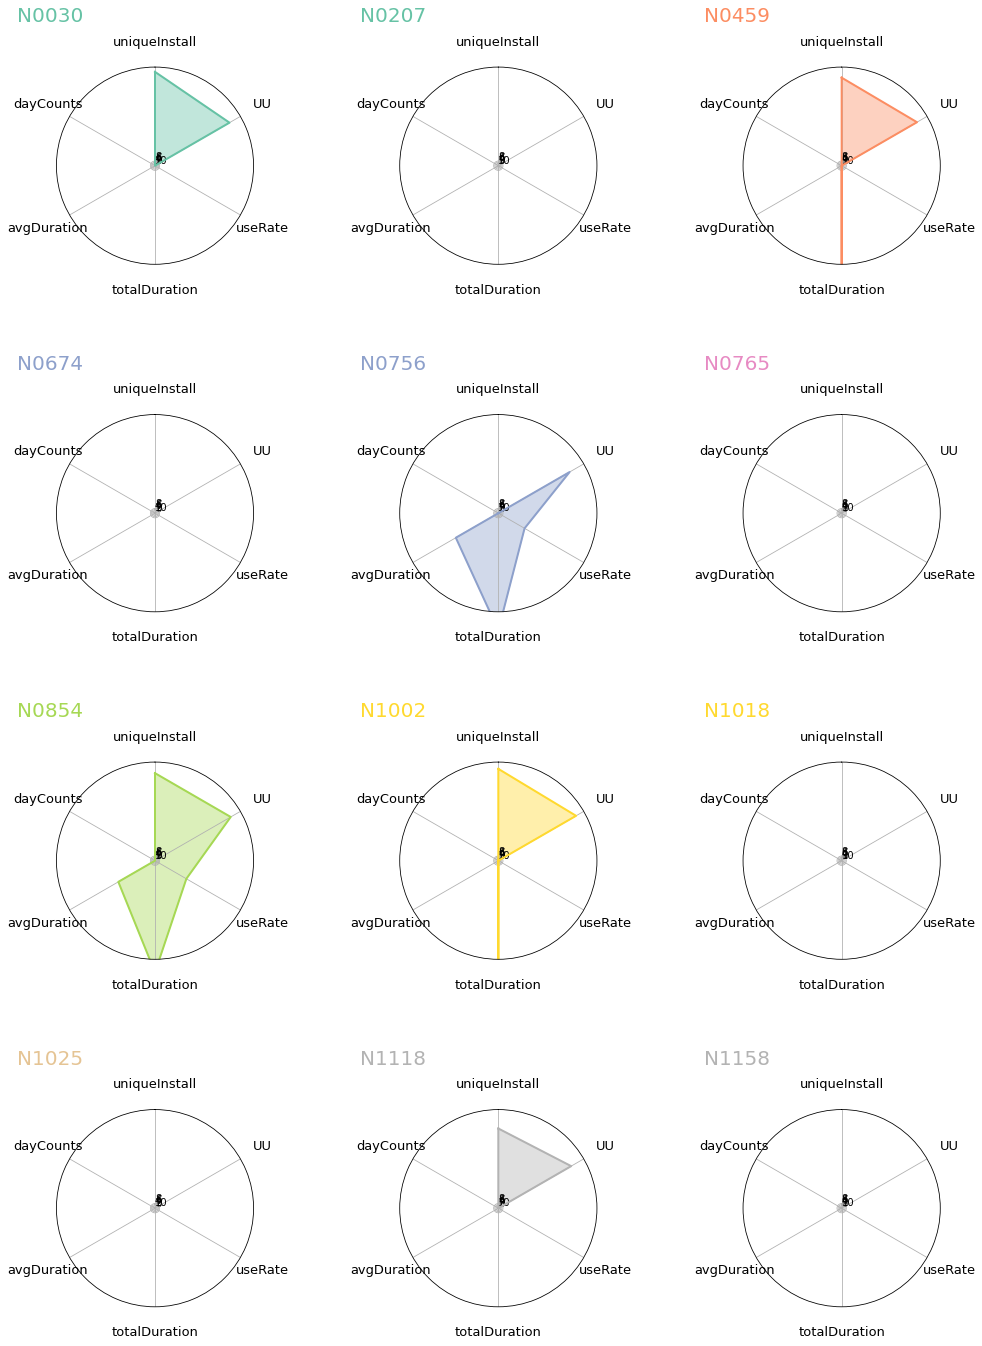

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = a
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('appID').tolist()
    data += data[:1]
    ax = plt.subplot(4,3,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,0.10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,17)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.appID, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [215]:
# - yearID: 연도 구분 (Y1 다음년도가 Y2)
# - weekIndex: 주차 1~52주
# - rank: 해당 주차의 앱 순위
# - appID: 앱 구분자
# - uniqueInstall: 앱 설치자 수(중복 불포함)
# - UU: 주간 이용자 수
# - useRate: 설치자중 이용자 비율
# - totalDuration: 총 이용시간(분)
# - avgDuration: 이용자당 평균 이용시간(분)
# - dayCounts: 이용자의 평균 접속일수

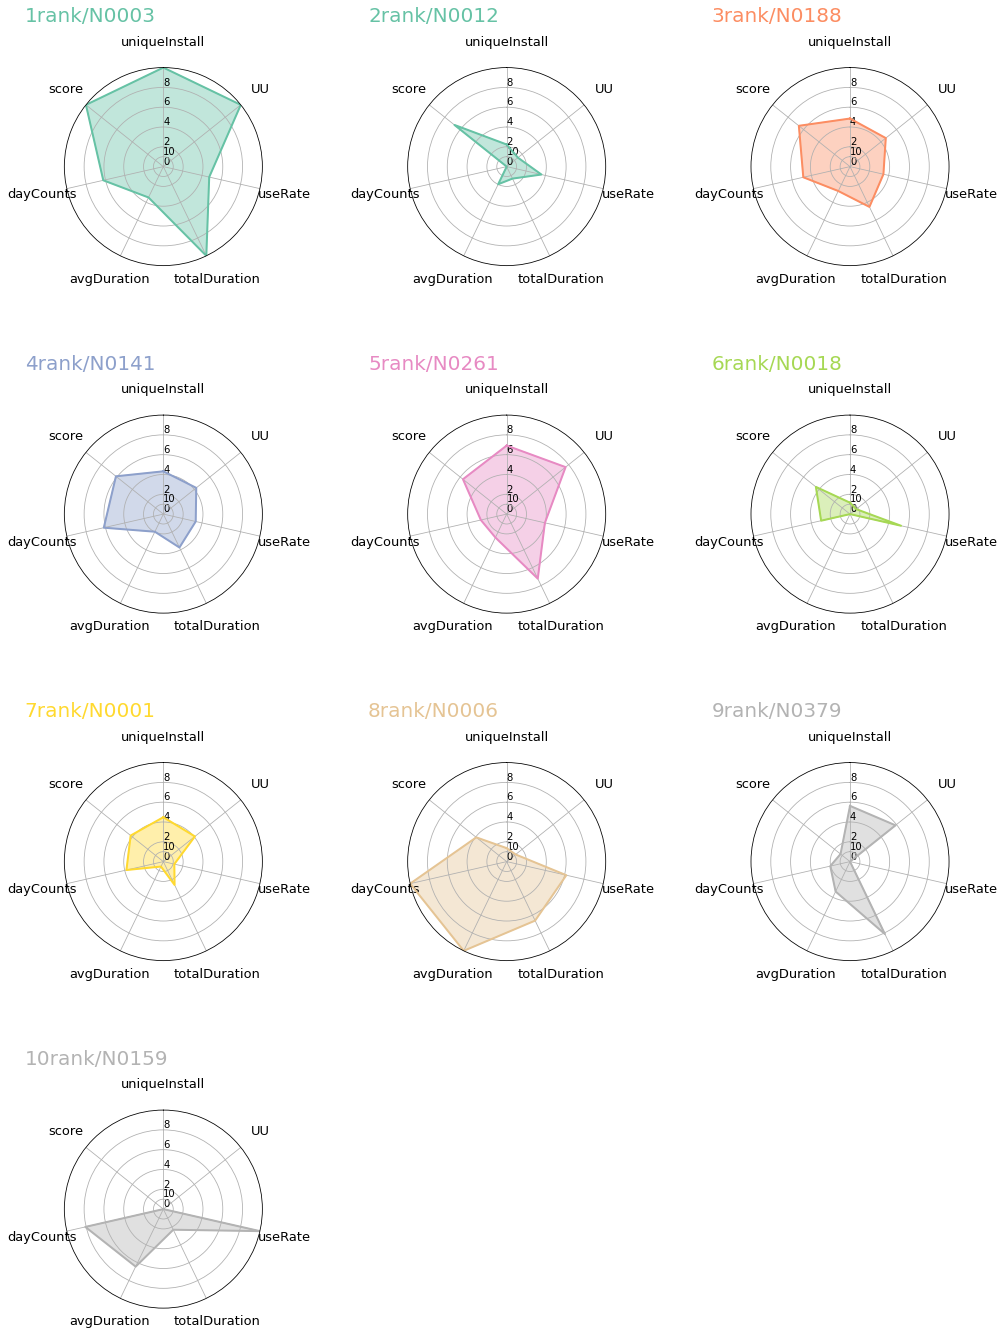

In [216]:
# 전체로 합시다 
df_1 = df_1.groupby("appID").sum().sort_values("score", ascending=False)

del df_1["rank"]

del df_1["weekIndex"]

df_2 = df_1[:10]

from sklearn.preprocessing import MinMaxScaler
min1 = MinMaxScaler()
output = min1.fit_transform(df_2)
output = pd.DataFrame(output, columns=df_2.columns, index=list(df_2.index.values))
output = output.reset_index().rename(columns={"index":"appID"})

output = output.reset_index(drop=True)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
 
## 데이터 준비
df = output
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('appID').tolist()
    data += data[:1]
    ax = plt.subplot(4,3,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1)
    ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,0.10],['0','2','4','6','8','10'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(str(i +1) + "rank" + "/" +row.appID , size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()